# Logistic Regression

In [1]:
import numpy as np
import pandas as pd 
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, classification_report
pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', 200)
pd.options.display.max_colwidth=300

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["patch.force_edgecolor"] = True

import seaborn as sns

In [2]:
df = pd.read_csv('application_clean.csv')

In [3]:
df.head()

,Unnamed: 0,target,flag_own_car,flag_own_realty,cnt_children,amt_goods_price,region_population_relative,days_registration,days_id_publish,own_car_age,flag_mobil,flag_emp_phone,flag_work_phone,flag_cont_mobile,flag_phone,flag_email,cnt_fam_members,region_rating_client,region_rating_client_w_city,hour_appr_process_start,reg_region_not_live_region,reg_region_not_work_region,live_region_not_work_region,reg_city_not_live_city,reg_city_not_work_city,live_city_not_work_city,ext_source_1,ext_source_2,ext_source_3,obs_30_cnt_social_circle,def_30_cnt_social_circle,obs_60_cnt_social_circle,def_60_cnt_social_circle,days_last_phone_change,flag_document_2,flag_document_3,flag_document_4,flag_document_5,flag_document_6,flag_document_7,flag_document_8,flag_document_9,flag_document_10,flag_document_11,flag_document_12,flag_document_13,flag_document_14,flag_document_15,flag_document_16,flag_document_17,flag_document_18,flag_document_19,flag_document_20,flag_document_21,amt_req_credit_bureau_hour,amt_req_credit_bureau_day,amt_req_credit_bureau_week,amt_req_credit_bureau_mon,amt_req_credit_bureau_qrt,amt_req_credit_bureau_year,cash_loan,code_gender_F,male,code_gender_XNA,name_type_suite_Children,name_type_suite_Family,name_type_suite_Group of people,name_type_suite_Other_A,name_type_suite_Other_B,"name_type_suite_Spouse, partner",name_type_suite_Unaccompanied,name_income_type_Businessman,name_income_type_Commercial associate,name_income_type_Maternity leave,name_income_type_Pensioner,name_income_type_State servant,name_income_type_Student,name_income_type_Unemployed,name_income_type_Working,name_education_type_Academic degree,name_education_type_Higher education,name_education_type_Incomplete higher,name_education_type_Lower secondary,name_education_type_Secondary / secondary special,name_family_status_Civil marriage,name_family_status_Married,name_family_status_Separated,name_family_status_Single / not married,name_family_status_Unknown,name_family_status_Widow,name_housing_type_Co-op apartment,name_housing_type_House / apartment,name_housing_type_Municipal apartment,name_housing_type_Office apartment,name_housing_type_Rented apartment,name_housing_type_With parents,occupation_type_Accountants,occupation_type_Cleaning staff,occupation_type_Cooking staff,occupation_type_Core staff,occupation_type_Drivers,occupation_type_HR staff,occupation_type_High skill tech staff,occupation_type_IT staff,occupation_type_Laborers,occupation_type_Low-skill Laborers,occupation_type_Managers,occupation_type_Medicine staff,occupation_type_Private service staff,occupation_type_Realty agents,occupation_type_Sales staff,occupation_type_Secretaries,occupation_type_Security staff,occupation_type_Waiters/barmen staff,weekday_appr_process_start_FRIDAY,weekday_appr_process_start_MONDAY,weekday_appr_process_start_SATURDAY,weekday_appr_process_start_SUNDAY,weekday_appr_process_start_THURSDAY,weekday_appr_process_start_TUESDAY,weekday_appr_process_start_WEDNESDAY,organization_type_Advertising,organization_type_Agriculture,organization_type_Bank,organization_type_Business Entity Type 1,organization_type_Business Entity Type 2,organization_type_Business Entity Type 3,organization_type_Cleaning,organization_type_Construction,organization_type_Culture,organization_type_Electricity,organization_type_Emergency,organization_type_Government,organization_type_Hotel,organization_type_Housing,organization_type_Industry: type 1,organization_type_Industry: type 10,organization_type_Industry: type 11,organization_type_Industry: type 12,organization_type_Industry: type 13,organization_type_Industry: type 2,organization_type_Industry: type 3,organization_type_Industry: type 4,organization_type_Industry: type 5,organization_type_Industry: type 6,organization_type_Industry: type 7,organization_type_Industry: type 8,organization_type_Industry: type 9,organization_type_Insurance,organization_type_Kindergarten,organization_type_Legal Services,organization_type_Medicine,organization_type_Military,

In [4]:
X = df.iloc[:,3:]
y = df.target
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=5)

In [5]:
from sklearn.preprocessing import MinMaxScaler, Imputer
imputer = Imputer(strategy = 'median')
scaler = MinMaxScaler(feature_range = (0, 1))
imputer.fit(X_train)

X_train = imputer.transform(X_train)
X_test = imputer.transform(X_test)
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

/Users/lennartjunge/anaconda3/envs/nf/lib/python3.6/site-packages/sklearn/utils/deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


In [6]:
from sklearn.linear_model import LogisticRegression
logit = LogisticRegression(C = 0.0001, class_weight='balanced')
logit.fit(X_train, y_train)

/Users/lennartjunge/anaconda3/envs/nf/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=0.0001, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [7]:
y_pred_logp = logit.predict_proba(X_test)[:, 1]
y_pred_logp

array([0.41797992, 0.66780123, 0.4030195 , ..., 0.52388971, 0.478117  ,
       0.63398364])

In [8]:
y_pred_log = logit.predict(X_test)
y_pred_log

array([0, 1, 0, ..., 1, 0, 1])

In [9]:
confusion_matrix(y_test, y_pred_log)

array([[45701, 25019],
       [ 2091,  4063]])

In [10]:
print( accuracy_score(y_test, y_pred_log) )

0.6473450061139007


In [11]:
print(classification_report(y_test, y_pred_log))

              precision    recall  f1-score   support

           0       0.96      0.65      0.77     70720
           1       0.14      0.66      0.23      6154

    accuracy                           0.65     76874
   macro avg       0.55      0.65      0.50     76874
weighted avg       0.89      0.65      0.73     76874



Text(0.5, 1.0, 'Confusion matrix for Logistic Regression')

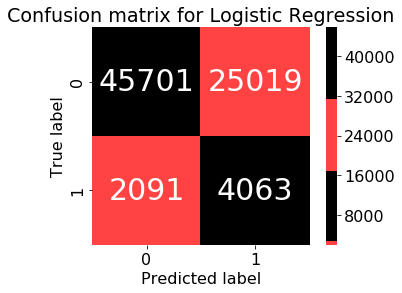

In [12]:
plt.rc('xtick', labelsize=16)
plt.rc('ytick', labelsize=16)
plt.rc('font', size=16)

colors = ['k', '#FF4343']
colors_r = ['#FF4343', 'k', '#FF4343', 'k']

plt.figure()
sns.heatmap(confusion_matrix(y_test, y_pred_log), annot=True, annot_kws={"size":30}, cmap=colors_r, center=17100, square=True, fmt='.0f')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title('Confusion matrix for Logistic Regression')